In [1]:
import sys
sys.path.append("..")
from radcloud.models.unet import unet
from radcloud.trainer import Trainer

#loss functions
from radcloud.losses.BCE_dice_loss import BCE_DICE_Loss
from radcloud.losses.dice_loss import DiceLoss
from radcloud.losses.focal_loss import FocalLoss
from radcloud.transforms.random_radar_noise import RandomRadarNoise

#other torch functions
from torch.nn import BCEWithLogitsLoss
from torchvision import transforms
import sys

In [ ]:
#initialize the unet
unet_model = unet(
    encoder_input_channels= 40,
    encoder_out_channels= (64,128,256),
    decoder_input_channels= (512,256,128),
    decoder_out_channels= 64,
    output_channels= 1,
    retain_dimmension= False,
    input_dimmensions= (64,48)
)

#initialize the transforms to use
input_transforms = [
    RandomRadarNoise(noise_level=0.0),
    transforms.ToTensor(),
    transforms.Resize((64,48))
]

output_transforms = [
    transforms.ToTensor(),
    transforms.Resize((64,48))
]

In [ ]:
#initialize the model training
model_trainer = Trainer(
    model= unet_model,
    dataset_path= "../data/train",
    input_directory="radar",
    output_directory="lidar",
    test_split= 0.15,
    working_dir="../working_dir",
    save_name="RadCloud_40_chirps_10e",
    input_transforms=input_transforms,
    output_transforms=output_transforms,
    batch_size= 256,
    epochs=10, #20
    learning_rate=0.001,
    loss_fn= BCE_DICE_Loss(dice_weight=0.1,dice_smooth=1),
    cuda_device='cuda:0',
    multiple_GPUs=False
)

[INFO] saving test image paths...
ModelTrainer._init_test_train_dataset: found 21079 samples in training dataset
ModelTrainer._init_test_train_dataset: found 3720 samples in test dataset


ModelTrainer.train: training the network...


  2%|▎         | 1/40 [01:24<54:36, 84.01s/it]

EPOCH: 1/40
	 Train loss: 0.11379477381706238, Test loss:0.09454776346683502


  5%|▌         | 2/40 [02:48<53:19, 84.18s/it]

EPOCH: 2/40
	 Train loss: 0.09282579272985458, Test loss:0.08816584199666977


  8%|▊         | 3/40 [04:12<51:56, 84.24s/it]

EPOCH: 3/40
	 Train loss: 0.08671854436397552, Test loss:0.08440934121608734


 10%|█         | 4/40 [05:36<50:33, 84.27s/it]

EPOCH: 4/40
	 Train loss: 0.08274265378713608, Test loss:0.08036457747220993


 12%|█▎        | 5/40 [07:01<49:10, 84.31s/it]

EPOCH: 5/40
	 Train loss: 0.07956286519765854, Test loss:0.0784619078040123


 15%|█▌        | 6/40 [08:25<47:47, 84.33s/it]

EPOCH: 6/40
	 Train loss: 0.07753710448741913, Test loss:0.07621808350086212


 18%|█▊        | 7/40 [09:50<46:26, 84.44s/it]

EPOCH: 7/40
	 Train loss: 0.07568421214818954, Test loss:0.07513484358787537


 20%|██        | 8/40 [11:14<45:00, 84.38s/it]

EPOCH: 8/40
	 Train loss: 0.07431405782699585, Test loss:0.07336006313562393


 22%|██▎       | 9/40 [12:38<43:34, 84.35s/it]

EPOCH: 9/40
	 Train loss: 0.07316067069768906, Test loss:0.07347996532917023


 25%|██▌       | 10/40 [14:03<42:10, 84.34s/it]

EPOCH: 10/40
	 Train loss: 0.07218664884567261, Test loss:0.07237584888935089


 28%|██▊       | 11/40 [15:27<40:45, 84.31s/it]

EPOCH: 11/40
	 Train loss: 0.07131875306367874, Test loss:0.07099048048257828


 30%|███       | 12/40 [16:51<39:20, 84.30s/it]

EPOCH: 12/40
	 Train loss: 0.07060722261667252, Test loss:0.07085240632295609


 32%|███▎      | 13/40 [18:16<37:56, 84.30s/it]

EPOCH: 13/40
	 Train loss: 0.06982065737247467, Test loss:0.07190309464931488


 35%|███▌      | 14/40 [19:40<36:30, 84.26s/it]

EPOCH: 14/40
	 Train loss: 0.06936891376972198, Test loss:0.0697927325963974


 38%|███▊      | 15/40 [21:04<35:06, 84.26s/it]

EPOCH: 15/40
	 Train loss: 0.06878223270177841, Test loss:0.06944258511066437


 40%|████      | 16/40 [22:28<33:42, 84.26s/it]

EPOCH: 16/40
	 Train loss: 0.06821456551551819, Test loss:0.06956257671117783


 42%|████▎     | 17/40 [23:53<32:18, 84.27s/it]

EPOCH: 17/40
	 Train loss: 0.06788522005081177, Test loss:0.0689506083726883


 45%|████▌     | 18/40 [25:17<30:53, 84.26s/it]

EPOCH: 18/40
	 Train loss: 0.06743133813142776, Test loss:0.06950993090867996


 48%|████▊     | 19/40 [26:41<29:29, 84.27s/it]

EPOCH: 19/40
	 Train loss: 0.06699323654174805, Test loss:0.06903833895921707


 50%|█████     | 20/40 [28:05<28:05, 84.26s/it]

EPOCH: 20/40
	 Train loss: 0.066729336977005, Test loss:0.06900432705879211


 52%|█████▎    | 21/40 [29:30<26:41, 84.27s/it]

EPOCH: 21/40
	 Train loss: 0.06624764204025269, Test loss:0.06830243021249771


 55%|█████▌    | 22/40 [30:54<25:16, 84.27s/it]

EPOCH: 22/40
	 Train loss: 0.06583333015441895, Test loss:0.06844156235456467


 57%|█████▊    | 23/40 [32:18<23:52, 84.29s/it]

EPOCH: 23/40
	 Train loss: 0.06545712798833847, Test loss:0.0680520087480545


 60%|██████    | 24/40 [33:42<22:28, 84.29s/it]

EPOCH: 24/40
	 Train loss: 0.06530517339706421, Test loss:0.06872883439064026


 62%|██████▎   | 25/40 [35:07<21:03, 84.25s/it]

EPOCH: 25/40
	 Train loss: 0.06507391482591629, Test loss:0.06799742579460144


 65%|██████▌   | 26/40 [36:31<19:39, 84.23s/it]

EPOCH: 26/40
	 Train loss: 0.06462734937667847, Test loss:0.06806972622871399


 68%|██████▊   | 27/40 [37:55<18:15, 84.24s/it]

EPOCH: 27/40
	 Train loss: 0.06438551843166351, Test loss:0.06827661395072937


 70%|███████   | 28/40 [39:19<16:50, 84.23s/it]

EPOCH: 28/40
	 Train loss: 0.06416197121143341, Test loss:0.0681101605296135


 72%|███████▎  | 29/40 [40:43<15:26, 84.22s/it]

EPOCH: 29/40
	 Train loss: 0.06390819698572159, Test loss:0.06854749470949173


 75%|███████▌  | 30/40 [42:08<14:02, 84.23s/it]

EPOCH: 30/40
	 Train loss: 0.0635848268866539, Test loss:0.06790393590927124


 78%|███████▊  | 31/40 [43:32<12:38, 84.23s/it]

EPOCH: 31/40
	 Train loss: 0.06332164257764816, Test loss:0.06887266784906387


 80%|████████  | 32/40 [44:56<11:13, 84.23s/it]

EPOCH: 32/40
	 Train loss: 0.06309422105550766, Test loss:0.06777092069387436


 82%|████████▎ | 33/40 [46:20<09:49, 84.23s/it]

EPOCH: 33/40
	 Train loss: 0.06294327974319458, Test loss:0.06808684766292572


 85%|████████▌ | 34/40 [47:45<08:25, 84.25s/it]

EPOCH: 34/40
	 Train loss: 0.06270106881856918, Test loss:0.0679517611861229


 88%|████████▊ | 35/40 [49:09<07:01, 84.25s/it]

EPOCH: 35/40
	 Train loss: 0.062418535351753235, Test loss:0.0678495317697525


 90%|█████████ | 36/40 [50:33<05:37, 84.25s/it]

EPOCH: 36/40
	 Train loss: 0.06224019452929497, Test loss:0.06844401359558105


 92%|█████████▎| 37/40 [51:57<04:12, 84.24s/it]

EPOCH: 37/40
	 Train loss: 0.06198267266154289, Test loss:0.0681731328368187


 95%|█████████▌| 38/40 [53:22<02:48, 84.23s/it]

EPOCH: 38/40
	 Train loss: 0.061862196773290634, Test loss:0.06828991323709488


 98%|█████████▊| 39/40 [54:46<01:24, 84.21s/it]

EPOCH: 39/40
	 Train loss: 0.06158914789557457, Test loss:0.06888316571712494


100%|██████████| 40/40 [56:10<00:00, 84.26s/it]

EPOCH: 40/40
	 Train loss: 0.06141534447669983, Test loss:0.06916684657335281
ModelTrainer.train: total training time 3370.53


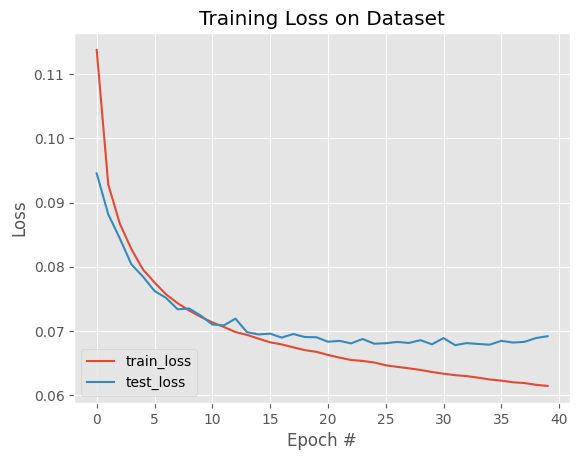

In [ ]:
#train the model
model_trainer.train_model()